# COVID-19

## IMPORTAÇÃO DE BIBLIOTECAS

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTAÇÃO DO DATASET DOS CASOS CONFIRMADOS

In [301]:
#Base de dados importada do github com casos 'confirmados' do covid-19 no formato csv
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [302]:
#Traduzindo algumas colunas do dataset
confirmados.rename(columns = {'Province/State' : 'Provincia/Estado', 'Country/Region':'Pais/Regiao'}, inplace=True)
confirmados.sample(5)

,Provincia/Estado,Pais/Regiao,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
178,NaN,Malaysia,4.210484,101.975766,0,0,0,4,4,4,...,4540612,4542705,4544626,4547051,4549847,4552359,4554661,4556664,4558558,4560583
28,NaN,Bolivia,-16.290200,-63.588700,0,0,0,0,0,0,...,915500,916092,916092,917537,918551,919737,920595,921104,921104,922121
227,NaN,Saudi Arabia,23.885942,45.079162,0,0,0,0,0,0,...,784837,786069,787212,788294,788294,788294,788294,791784,792860,793729
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
217,NaN,Qatar,25.354800,51.183900,0,0,0,0,0,0,...,375481,376149,376811,377482,378176,378818,379277,379862,380530,381269


In [303]:
#Datarame em ordem decrescente com a quantidade total de casos confirmados até o dia 27 de junho de 2022
confirmados_pais = confirmados.groupby(['Pais/Regiao']).sum()
confirmados_pais_total = pd.DataFrame(confirmados_pais.iloc[:,-1])
confirmados_pais_total.reset_index(inplace=True)
confirmados_pais_total.columns=('Pais/Regiao', 'Casos Confirmados')
confirmados_pais_total.sort_values(by='Casos Confirmados', ascending=False)

,Pais/Regiao,Casos Confirmados
184,US,87217673
80,India,43433345
24,Brazil,32206954
63,France,31027099
67,Germany,28048190
...,...,...
76,Holy See,29
114,Marshall Islands,18
5,Antarctica,11
107,MS Zaandam,9


Text(0.5, 1.0, 'Casos confirmados')

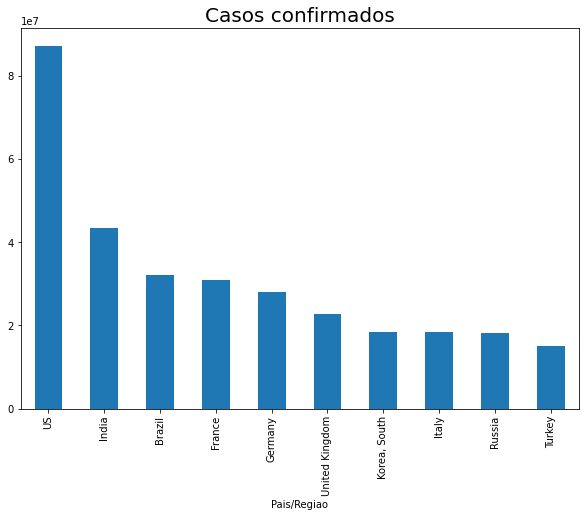

In [304]:
#Grafico de barra com os 10 com maior quantidade de casos confirmados até o dia 27 de junho de 2022
confirmados_pais_total.sort_values(by='Casos Confirmados', ascending=False)[:10].plot(
    x='Pais/Regiao',kind='bar',figsize=(10,7), fontsize=10, legend=False)
plt.title('Casos confirmados', fontsize=20)

### ANÁLISE CASOS CONFIRMADOS NO BRASIL

Text(0.5, 1.0, 'Casos confirmados no Brasil ao longo do tempo')

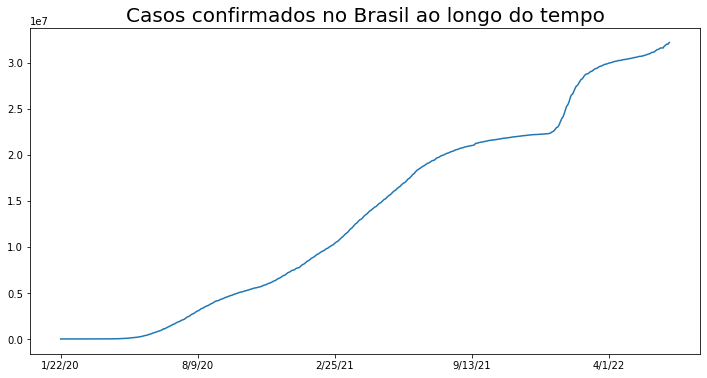

In [305]:
#vizualização de casos confirmados no Brasil ao longo do tempo
plt.figure(figsize=(12,6))
confirmados_pais = confirmados.groupby('Pais/Regiao').sum()
confirmados_pais.loc['Brazil'][2:].plot()
plt.title('Casos confirmados no Brasil ao longo do tempo', fontsize=20)

<AxesSubplot:title={'center':'Novos casos confirmados no Brasil'}>

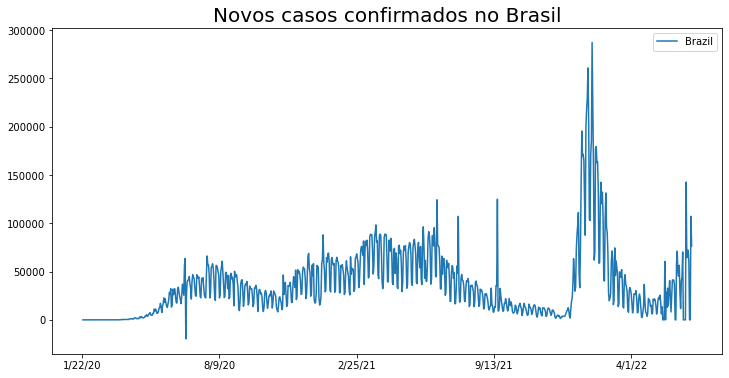

In [306]:
#vizualização de novos casos confirmados no Brasil ao longo do tempo
plt.figure(figsize=(12,6))
novos_casos_brasil = confirmados_pais.loc['Brazil'][2:].diff()
plt.title('Novos casos confirmados no Brasil', fontsize=20)
novos_casos_brasil.plot(legend=['Brazil'])

### IMPORTAÇÃO DO DATASET DOS CASOS DE ÓBITOS

In [307]:
#Base de dados importada do github com casos 'óbitos' do covid-19 no formato csv
obitos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
obitos.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7713,7714,7715,7715,7715,7717,7717,7717,7720,7722
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3498
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [308]:
#Traduzindo algumas colunas do dataset
obitos.rename(columns = {'Province/State' : 'Provincia/Estado', 'Country/Region':'Pais/Regiao'}, inplace=True)
obitos.sample(5)

,Provincia/Estado,Pais/Regiao,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
73,Hunan,China,27.6104,111.7088,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
132,NaN,Gabon,-0.8037,11.6094,0,0,0,0,0,0,...,304,304,304,304,305,305,305,305,305,305
18,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,9716,9716,9716,9716,9716,9717,9717,9717,9717,9717
248,NaN,Tajikistan,38.8610,71.2761,0,0,0,0,0,0,...,125,125,125,125,125,125,125,125,125,125
222,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,376,376,376,376,376,380,380,380,380,380


In [309]:
#Datarame em ordem decrescente com quantidade de óbitos até o dia 27 de junho de 2022
obitos_pais = obitos.groupby(['Pais/Regiao']).sum()
obitos_pais = pd.DataFrame(obitos_pais.iloc[:,-1])
obitos_pais.reset_index(inplace=True)
obitos_pais.columns=('Pais/Regiao', 'Obitos')
obitos_pais.sort_values(by='Obitos', ascending=False)

,Pais/Regiao,Obitos
184,US,1016757
24,Brazil,670848
80,India,525077
146,Russia,373297
117,Mexico,325638
...,...,...
118,Micronesia,0
76,Holy See,0
195,Winter Olympics 2022,0
169,Summer Olympics 2020,0


Text(0.5, 1.0, 'Óbitos')

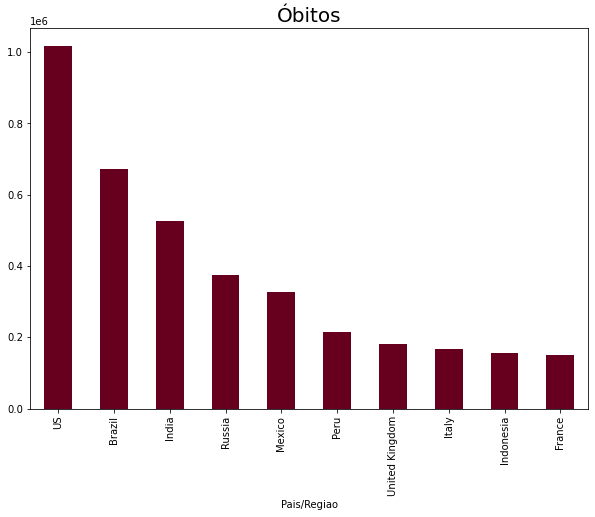

In [310]:
#Grafico de barra com os 10 países com maior quantidade de óbitos até o dia 27 de junho de 2022
obitos_pais.sort_values(by='Obitos', ascending=False)[:10].plot(
    x='Pais/Regiao',kind='bar',figsize=(10,7), fontsize=10, legend=False, colormap='RdGy')
plt.title('Óbitos', fontsize=20)

Text(0.5, 1.0, 'Óbitos no Brasil ao longo do tempo')

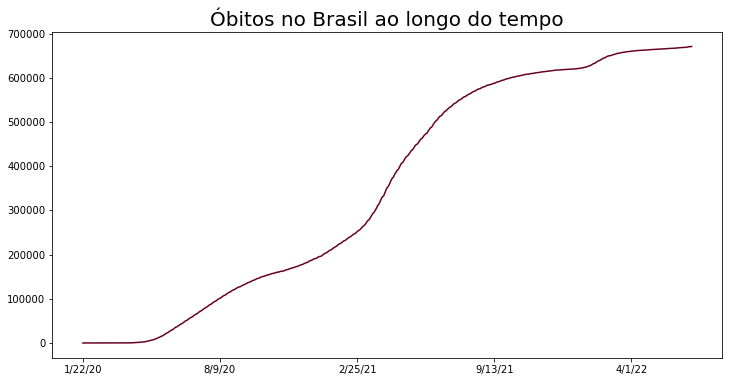

In [311]:
#vizualização de óbitos no Brasil ao longo do tempo
plt.figure(figsize=(12,6))
obitos_pais = obitos.groupby('Pais/Regiao').sum()
obitos_pais.loc['Brazil'][2:].plot(colormap='RdGy')
plt.title('Óbitos no Brasil ao longo do tempo', fontsize=20)

<AxesSubplot:title={'center':'Novos casos de Óbitos no Brasil'}>

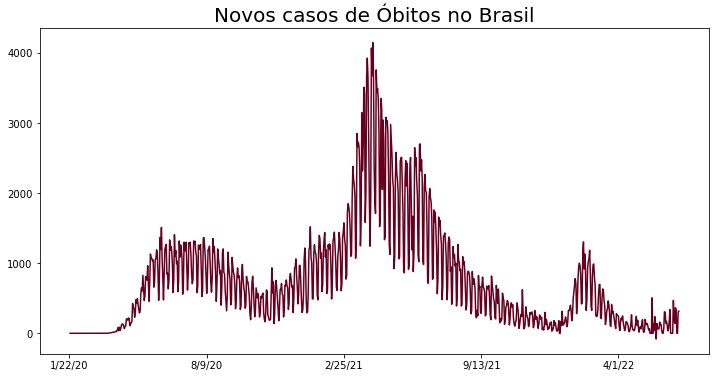

In [312]:
#vizualização de novos Óbitos no Brasil ao longo do tempo
plt.figure(figsize=(12,6))
novos_obitos_brasil = obitos_pais.loc['Brazil'][2:].diff()
plt.title('Novos casos de Óbitos no Brasil', fontsize=20)
novos_obitos_brasil.plot(colormap='RdGy')

#### IMPORTAÇÃO DO DATASET DOS CASOS RECUPERADOS

In [313]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
#Traduzindo algumas colunas do dataset
recuperados.rename(columns = {'Province/State' : 'Provincia/Estado', 'Country/Region':'Pais/Regiao'}, inplace=True)
recuperados.sample(5)

,Provincia/Estado,Pais/Regiao,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
62,Jilin,China,43.666100,126.19230,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,NaN,Montenegro,42.708678,19.37439,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,French Guiana,France,3.933900,-53.12580,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,NaN,Jamaica,18.109600,-77.29750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,Greenland,Denmark,71.706900,-42.60430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
#Datarame com a quantidade de casos Recuperados até o dia 04 de agosto de 2021
recuperados_pais = recuperados.groupby(['Pais/Regiao']).sum()
recuperados_pais = pd.DataFrame(recuperados_pais['8/4/21'])
recuperados_pais.reset_index(inplace=True)
recuperados_pais.columns=('Pais/Regiao', 'Recuperados')
recuperados_pais.sort_values(by='Recuperados', ascending=False)

,Pais/Regiao,Recuperados
80,India,30974748
24,Brazil,17771228
146,Russia,5609682
183,Turkey,5478185
7,Argentina,4615834
...,...,...
5,Antarctica,0
92,Kiribati,0
136,Palau,0
195,Winter Olympics 2022,0


##### obs: No dataset tem apenas dados sobre os recuperados ate o dia 04 de agosto de 2021

Text(0.5, 1.0, 'Recuperados')

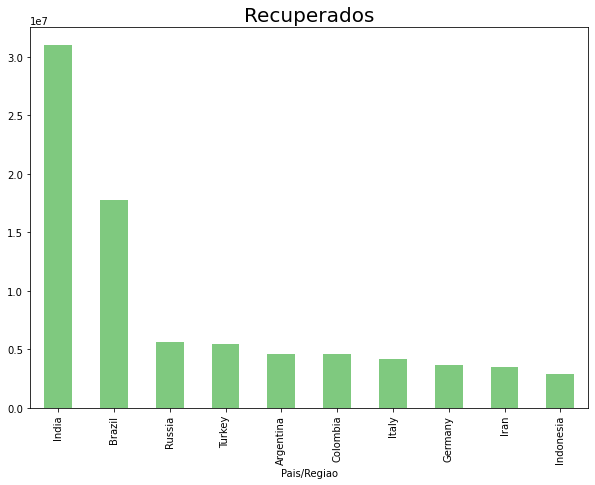

In [316]:
#Grafico de barra com a quantidade total de casos recuperados até o dia 04 de Agosto de 2021
recuperados_pais.sort_values(by='Recuperados', ascending=False)[:10].plot(colormap='Accent',
    x='Pais/Regiao',kind='bar',figsize=(10,7), fontsize=10, legend=False)
plt.title('Recuperados', fontsize=20)


Text(0.5, 1.0, 'Recuperados no Brasil ao longo do Tempo')

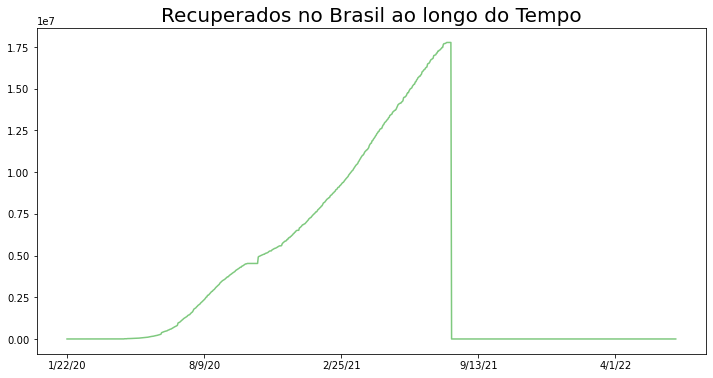

In [317]:
#vizualização de Recuperados no Brasil
plt.figure(figsize=(12,6))
recuperados_pais = recuperados.groupby('Pais/Regiao').sum()
recuperados_pais.loc['Brazil'][2:].plot(colormap='Accent')
plt.title('Recuperados no Brasil ao longo do Tempo', fontsize=20)

##### obs: No dataset tem apenas dados sobre os recuperados ate o dia 04 de agosto de 2021

## MESCLANDO AS BASES DE DADOS

In [318]:
#Agrupando os dados pelo 'Pais/Região' e realizando a mesclagem
confirmados_mesclagem = confirmados.groupby('Pais/Regiao').sum().iloc[:,-1]
obitos_mesclagem = obitos.groupby('Pais/Regiao').sum().iloc[:,-1]
recuperados_mesclagem = recuperados.groupby('Pais/Regiao').sum()['8/4/21']

dados = [confirmados_mesclagem, obitos_mesclagem, recuperados_mesclagem]
dados = pd.concat(dados, axis=1)
dados.columns=['confirmados', 'obitos', 'recuperados']
dados.sample(5)

,confirmados,obitos,recuperados
Pais/Regiao,,,
Paraguay,655532,18963,423964
Honduras,426879,10905,102384
United Kingdom,22855565,180800,24693
Armenia,423243,8629,220438
France,31027099,150482,415111


### Taxa de letalidade no mundo

In [319]:
#Calculo da taxa de letalidade no mundo
soma = dados.sum()
taxa_letalidade = ((soma['obitos'] / soma['confirmados']) * 100).round(2)
print(f'A taxa de letalidade no mundo é de {taxa_letalidade}%')

A taxa de letalidade no mundo é de 1.16%


In [320]:
#Criando coluna de letalidade para cada Pais
#Exibindo os paises que tem mais de 1000 casos, com maiores letalidades 
dados['Taxa_letalidade'] = (dados['obitos'] / dados['confirmados'] * 100).round(2)
dados.query('confirmados > 1000').sort_values(by='Taxa_letalidade', ascending=False)[:10]

,confirmados,obitos,recuperados,Taxa_letalidade
Pais/Regiao,,,,
Yemen,11824,2149,4251,18.17
Sudan,62551,4951,30647,7.92
Peru,3620801,213483,2086086,5.90
Syria,55925,3150,22019,5.63
Mexico,5986917,325638,2270427,5.44
Somalia,26803,1361,7661,5.08
Egypt,515645,24723,232179,4.79
Afghanistan,182324,7722,82586,4.24
Bosnia and Herzegovina,378577,15805,189710,4.17


### Taxa de letalidade no Brasil

In [321]:
#Verificando a taxa de letalidade no Brasil
letalidade_brasil = dados.loc['Brazil']['Taxa_letalidade']
print(f'A taxa de letalidade no Brasil é de {letalidade_brasil}%')

A taxa de letalidade no Brasil é de 2.08%


### Taxa de incidência no Brasil

In [322]:
casos_brasil = dados['confirmados'].loc['Brazil']
populacao = 214787100
taxa_incidencia = casos_brasil / populacao * 100000
print(f'A taxa de incidência do covid-19 no Brasil por 100 mil habitantes é de {taxa_incidencia.round()}')

A taxa de incidência do covid-19 no Brasil por 100 mil habitantes é de 14995.0


## MAPA ÓBITOS COVID-19 NO MUNDO

In [323]:
pip install folium

In [324]:
import folium

In [325]:
obitos['Long'].fillna(0, inplace=True)

In [326]:
obitos['Lat'].fillna(0, inplace=True)

In [327]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=2)


for i in range(0, len(obitos)):
    folium.Circle(
        location=[obitos.iloc[i]['Lat'],obitos.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Pais : '+str(temp.iloc[i]['Pais/Regiao'])+
                    '<li><bold>Óbitos : '+str(temp.iloc[i]['6/28/22']),
        radius=int(temp.iloc[i]['6/28/22'])**1.03).add_to(m)
m